In [1]:
import numpy as np
import scprep
import matplotlib.pyplot as plt
import scanpy as sc
import pickle
import pathlib
import seaborn as sns
import pandas as pd

In [2]:
fig_path = '../figures_Dec22/'
pathlib.Path(fig_path).mkdir(parents=True, exist_ok=True)

In [3]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [4]:
traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')

In [5]:
# bad_id = traj_A[-1, :, 0].argmax()
# good_id = np.setdiff1d(np.arange(traj_A.shape[1]), bad_id)
# traj_A = traj_A[:, good_id, :]

In [6]:
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


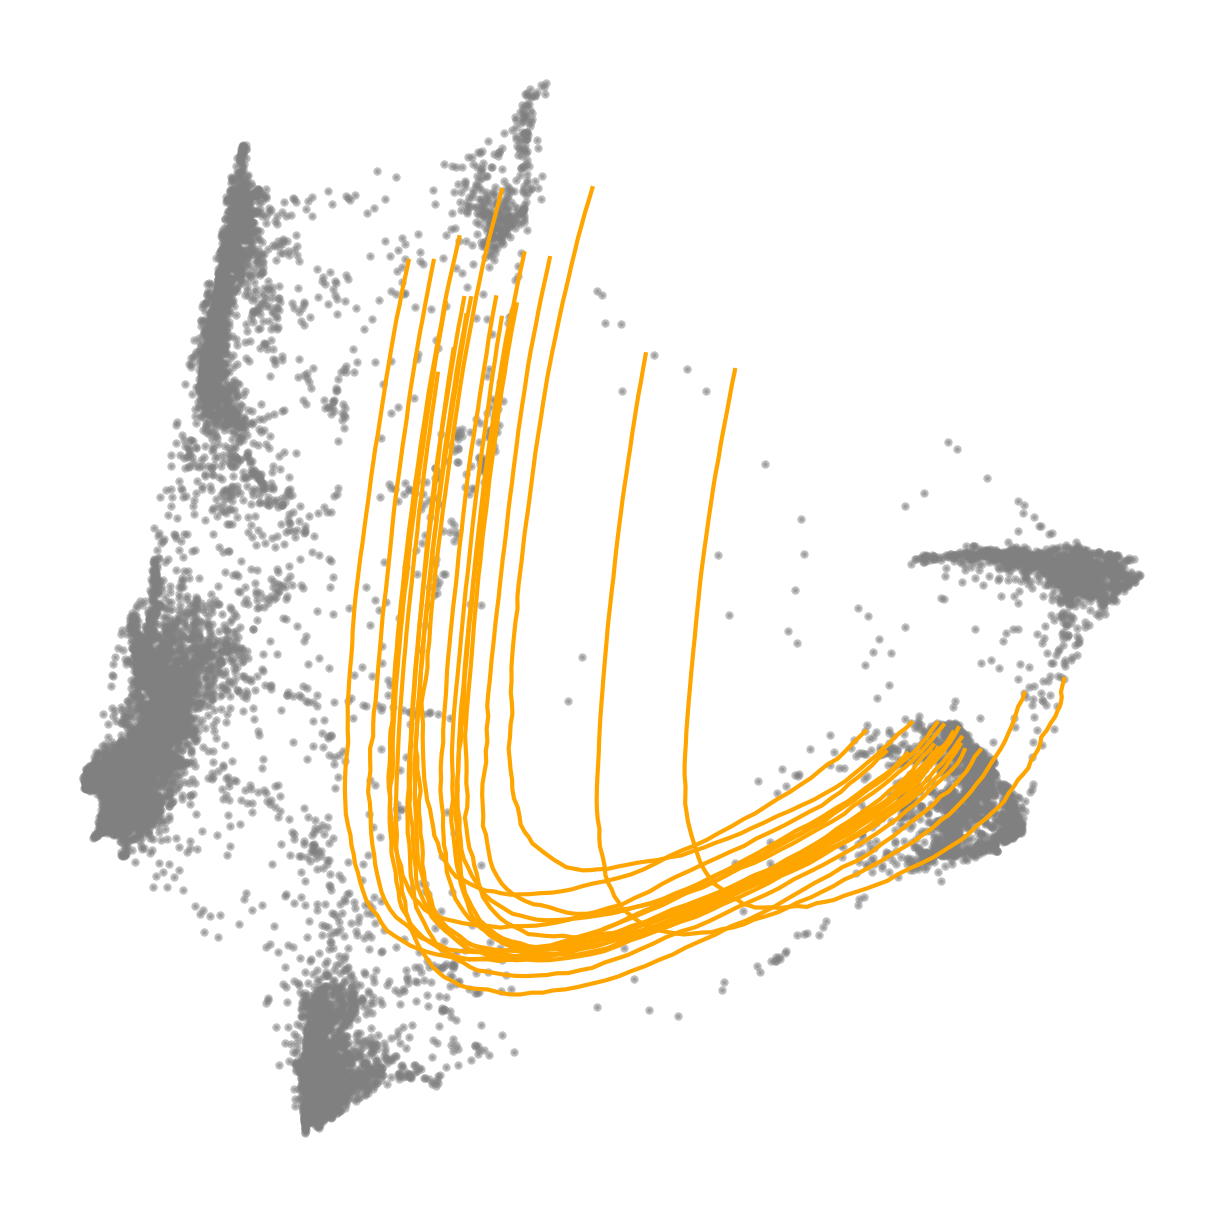

In [7]:
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(X_phate[:, 0], X_phate[:, 1],
                c='gray', s=1, alpha=0.5)

np.random.seed(0)
# subsampled_idx = np.random.choice(traj_A.shape[1], 10, replace=False)
subsampled_idx = np.arange(traj_A.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_A[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='orange');

# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{fig_path}/figure_5Ca.png', bbox_inches='tight')
plt.show()


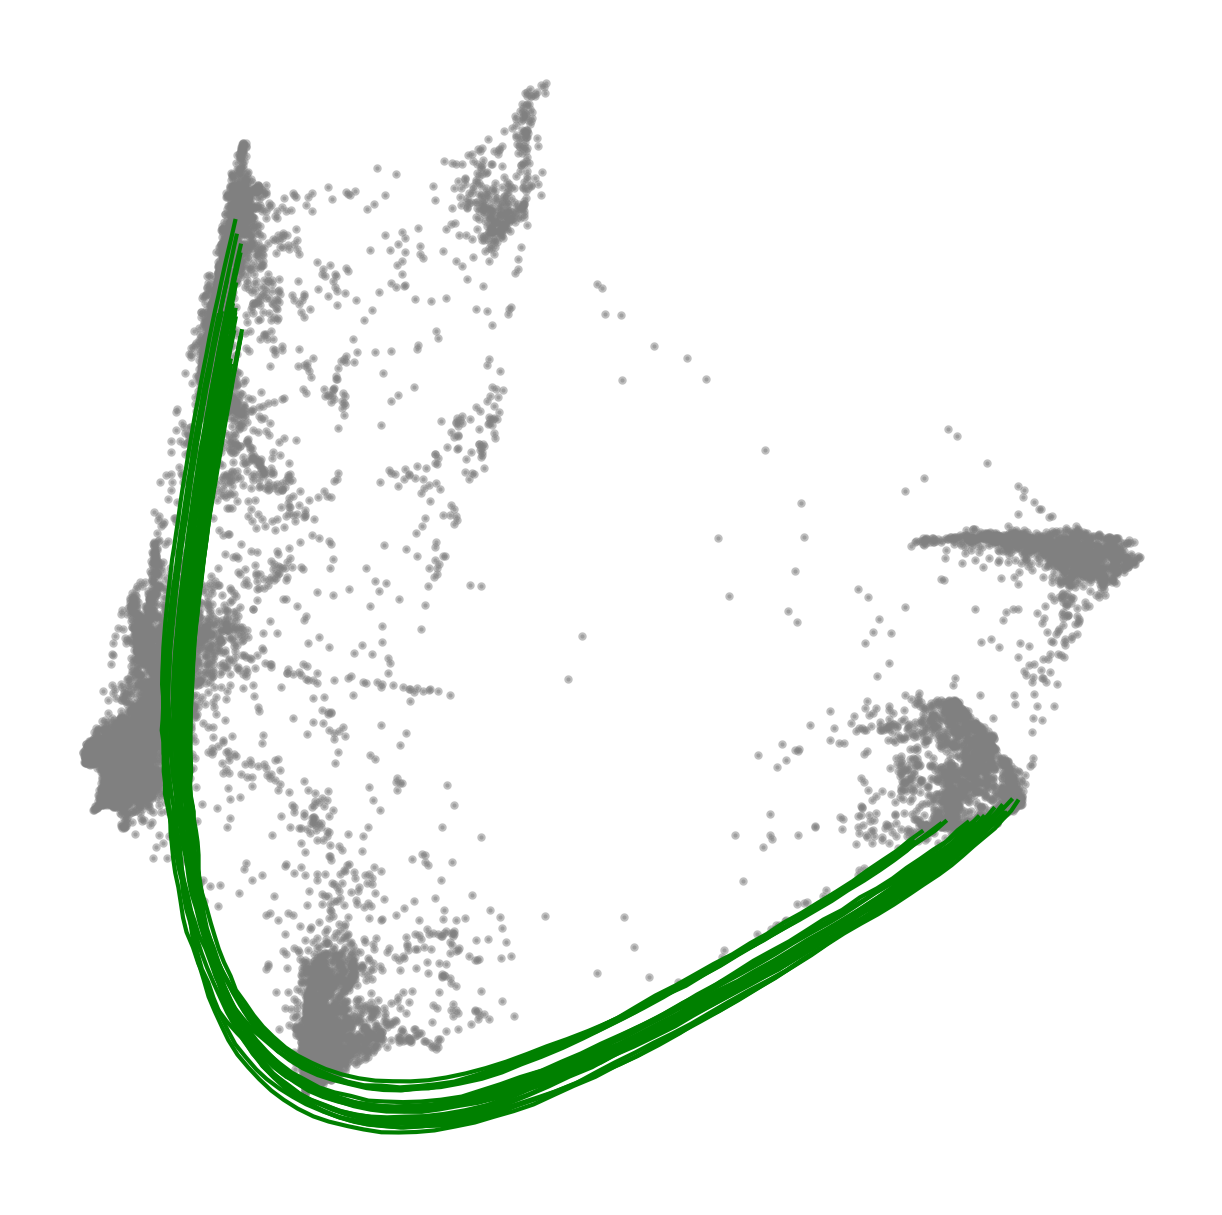

In [8]:
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(X_phate[:, 0], X_phate[:, 1],
                c='gray', s=1, alpha=0.5)

np.random.seed(0)
subsampled_idx = np.random.choice(traj_T.shape[1], 20, replace=False)
# subsampled_idx = np.arange(traj_T.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_T[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='green');

# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{fig_path}/figure_5Cb.png', bbox_inches='tight')
plt.show()


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


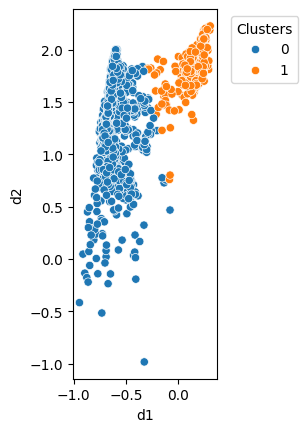

In [9]:
# cluster "starting" points and annotate trajectories
np.random.seed(32)
# t0_df = df[df['samples'] == 3].copy()
subset = adata[adata.obs['day'] == adata.obs['day'].max()].obsm['X_phate']
t0_df = pd.DataFrame(subset, columns=['d1', 'd2'])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
t0_df['cluster'] = kmeans.fit_predict(t0_df[['d1', 'd2']])
subset = scaler.transform(subset)
t0_df[['d1', 'd2']] = subset
# Create scatter plot using seaborn
scatter = sns.scatterplot(data=t0_df, x='d1', y='d2', hue='cluster', palette='tab10')

# Add legend
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_aspect('equal')

In [10]:
subset = adata[adata.obs['day'] != adata.obs['day'].max()].obsm['X_phate']
subset = scaler.transform(subset)
t1_df = pd.DataFrame(subset, columns=['d1', 'd2'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


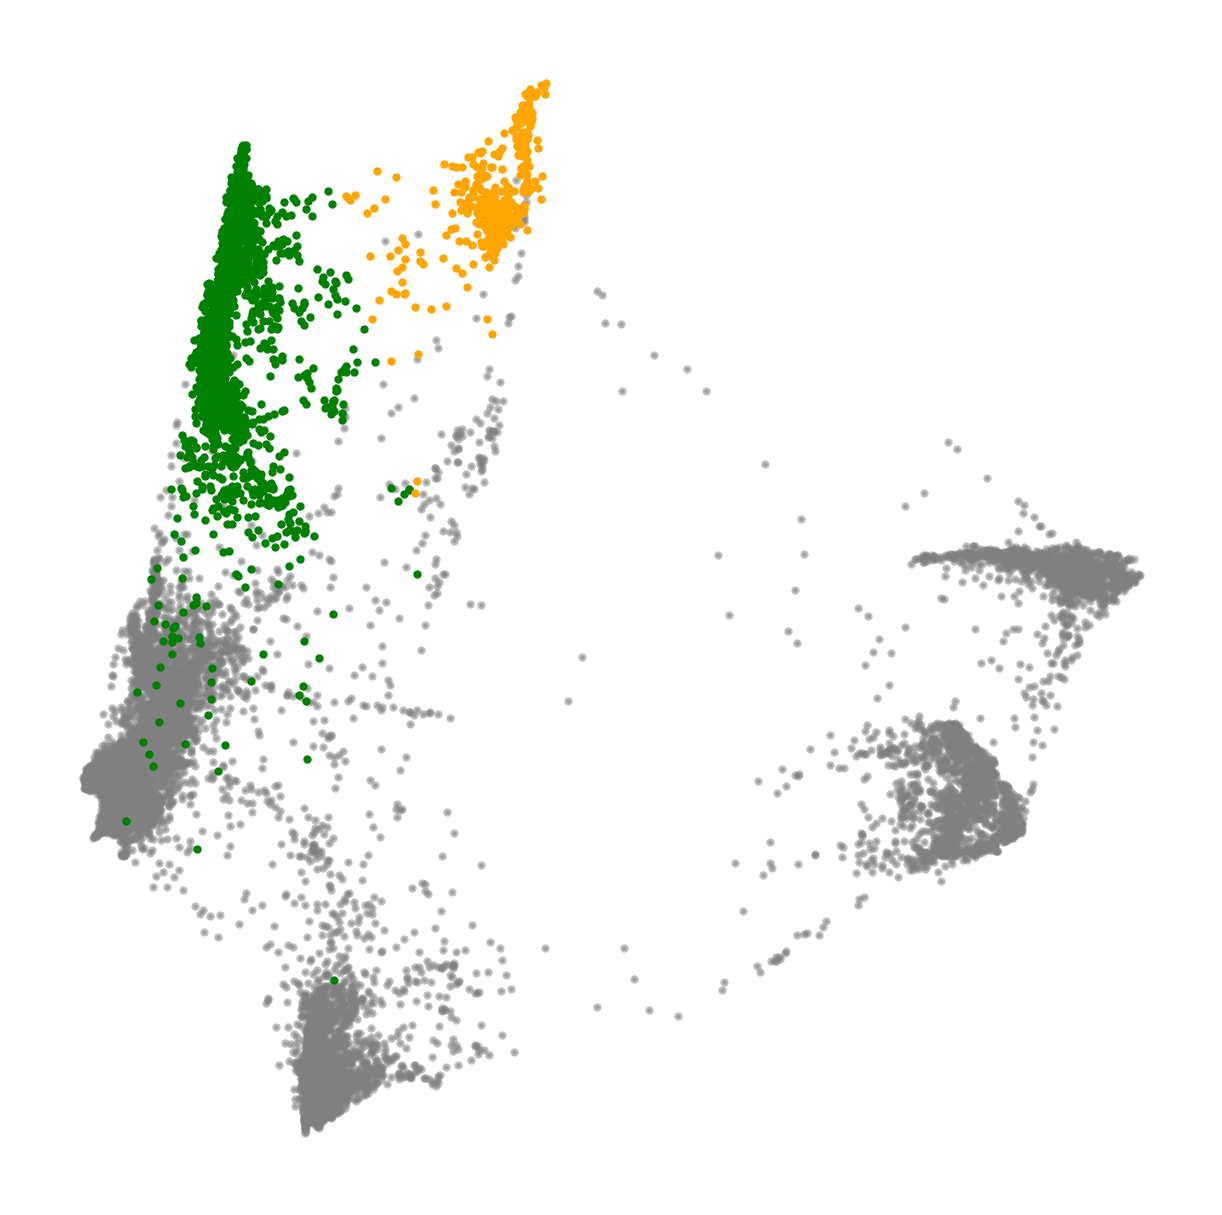

In [11]:
plt.figure(figsize=(5, 5), dpi=300)
plt.scatter(t1_df.values[:, 0], t1_df.values[:, 1],
                c='gray', s=1, alpha=0.5)
plt.scatter(t0_df[t0_df['cluster'] == 0].values[:, 0], t0_df[t0_df['cluster'] == 0].values[:, 1],
                c='green', s=1, alpha=1.)
plt.scatter(t0_df[t0_df['cluster'] == 1].values[:, 0], t0_df[t0_df['cluster'] == 1].values[:, 1],
                c='orange', s=1, alpha=1.)

# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{fig_path}/figure_5Da.png', bbox_inches='tight')
plt.show()


In [12]:
adata.obs['day'].value_counts()

12.0    4305
18.0    4040
30.0    2971
0.0     2837
2.0     2832
Name: day, dtype: int64

In [13]:
subset30 = adata[adata.obs['day'] == 30.0].obsm['X_phate']
subset18 = adata[adata.obs['day'] == 18.0].obsm['X_phate']
subset12 = adata[adata.obs['day'] == 12.0].obsm['X_phate']
subset30 = scaler.transform(subset30)
subset18 = scaler.transform(subset18)
subset12 = scaler.transform(subset12)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


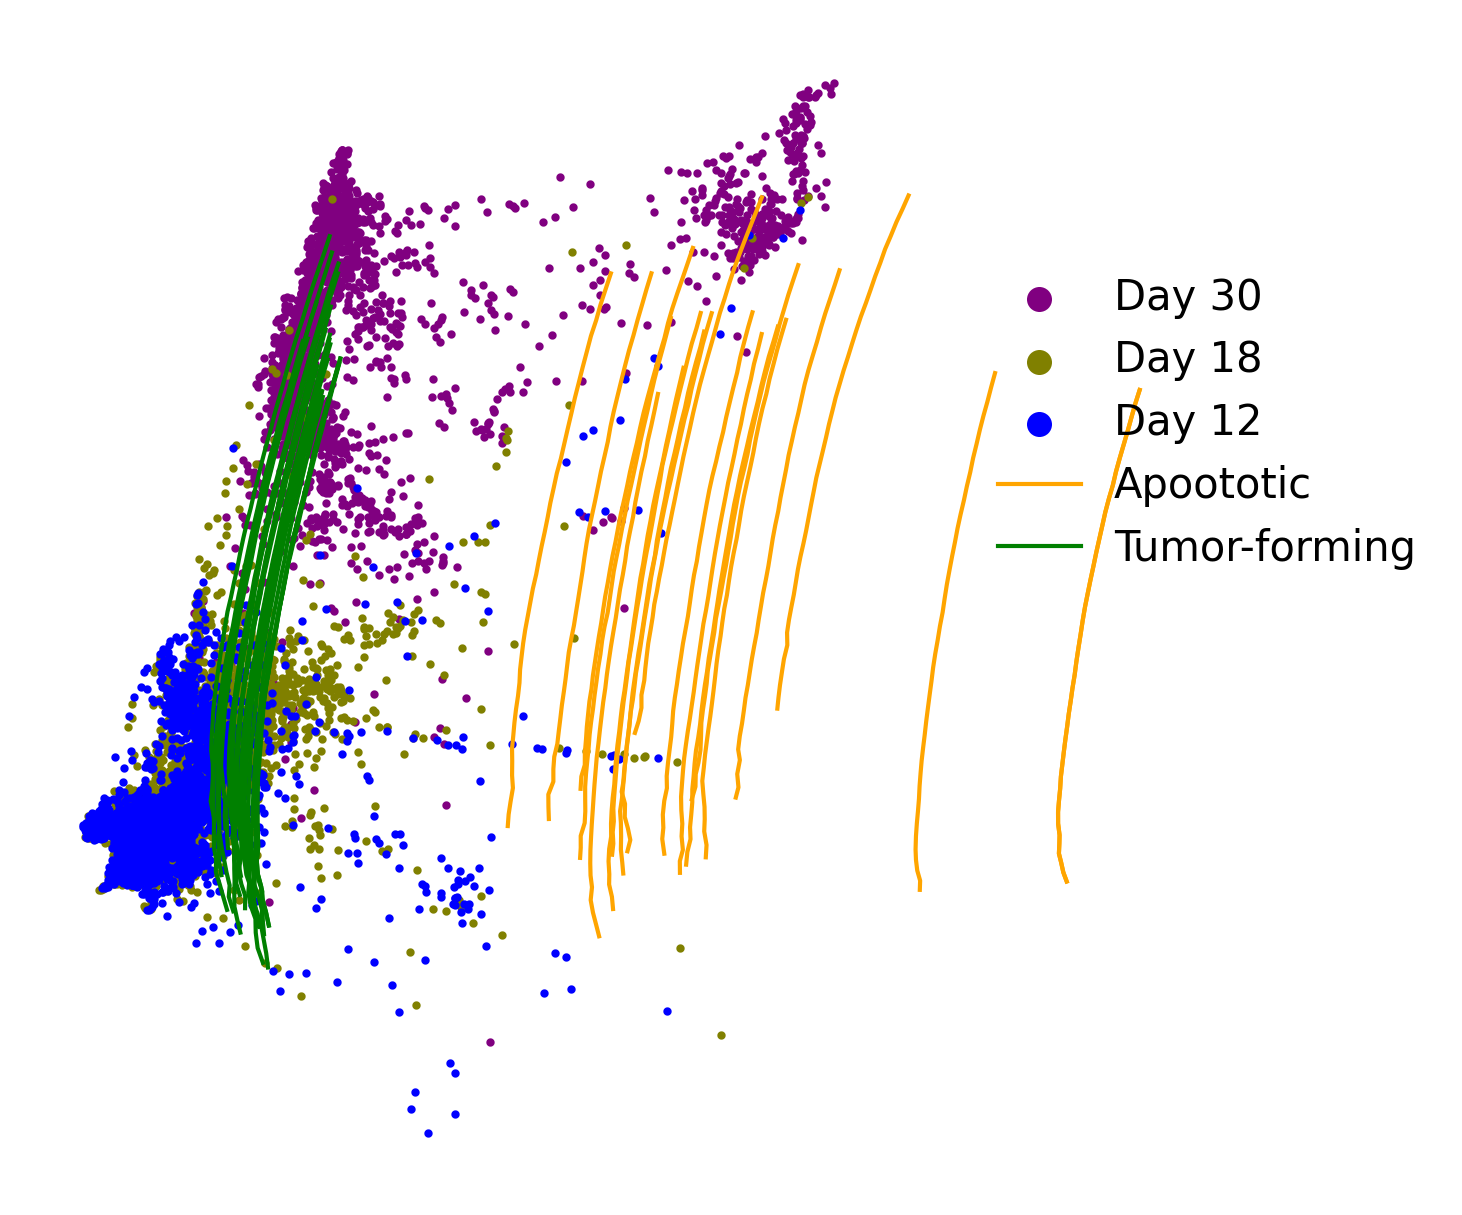

In [15]:
plt.figure(figsize=(5, 5), dpi=300)

plt.scatter(subset30[:, 0], subset30[:, 1],
                c='purple', s=1, alpha=1., label='Day 30')
plt.scatter(subset18[:, 0], subset18[:, 1],
                c='olive', s=1, alpha=1., label='Day 18')
plt.scatter(subset12[:, 0], subset12[:, 1],
                c='blue', s=1, alpha=1., label='Day 12')

# plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5)

np.random.seed(2)
# subsampled_idx = np.random.choice(traj_A.shape[1], 25, replace=False)
subsampled_idx = np.arange(traj_A.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_A[60:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='orange');

plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='orange', label='Apoototic');
# plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5)


np.random.seed(0)
# subsampled_idx = np.random.choice(traj_T.shape[1], 25, replace=False)
subsampled_idx = np.arange(traj_T.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_T[60:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='green');

plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='green', label='Tumor-forming');
plt.legend(title="", bbox_to_anchor=(0.8, 0.5), markerscale=5, frameon=False)

# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{fig_path}/figure_5Db.png', bbox_inches='tight')
plt.show()


In [16]:
traj_A_gene = np.load('../results_final_Dec22/traj_gene_space_A_extreme.npy')
traj_T_gene = np.load('../results_final_Dec22/traj_gene_space_T_extreme.npy')

In [17]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['HES1', 'FOXO3', 'DDIT3', 'ARNT', 'ESRRA', 'ZEB1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

HES1 True
FOXO3 True
DDIT3 True
ARNT True
ESRRA True
ZEB1 True


In [18]:
gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene[:, :, gene_mask]
traj_T_gene = traj_T_gene[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

In [19]:
traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

In [20]:
traj_A_gene_mean = traj_A_gene.mean(axis=1)
traj_A_gene_std = traj_A_gene.std(axis=1)
traj_A_gene_mean_std = traj_A_gene_mean.std(axis=0)
zero_std_genes = traj_A_gene_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj_A_gene, traj_A_gene_mean, traj_A_gene_std, traj_A_gene_mean_std = traj_A_gene[..., ~zero_std_genes], traj_A_gene_mean[..., ~zero_std_genes], traj_A_gene_std[..., ~zero_std_genes], traj_A_gene_mean_std[..., ~zero_std_genes]
traj_A_gene_mean_normalized = (traj_A_gene_mean - traj_A_gene_mean.mean(axis=0)) / traj_A_gene_mean.std(axis=0)

In [21]:
traj_T_gene_mean = traj_T_gene.mean(axis=1)
traj_T_gene_std = traj_T_gene.std(axis=1)
traj_T_gene_mean_std = traj_T_gene_mean.std(axis=0)
zero_std_genes = traj_T_gene_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj_T_gene, traj_T_gene_mean, traj_T_gene_std, traj_T_gene_mean_std = traj_T_gene[..., ~zero_std_genes], traj_T_gene_mean[..., ~zero_std_genes], traj_T_gene_std[..., ~zero_std_genes], traj_T_gene_mean_std[..., ~zero_std_genes]
traj_T_gene_mean_normalized = (traj_T_gene_mean - traj_T_gene_mean.mean(axis=0)) / traj_T_gene_mean.std(axis=0)

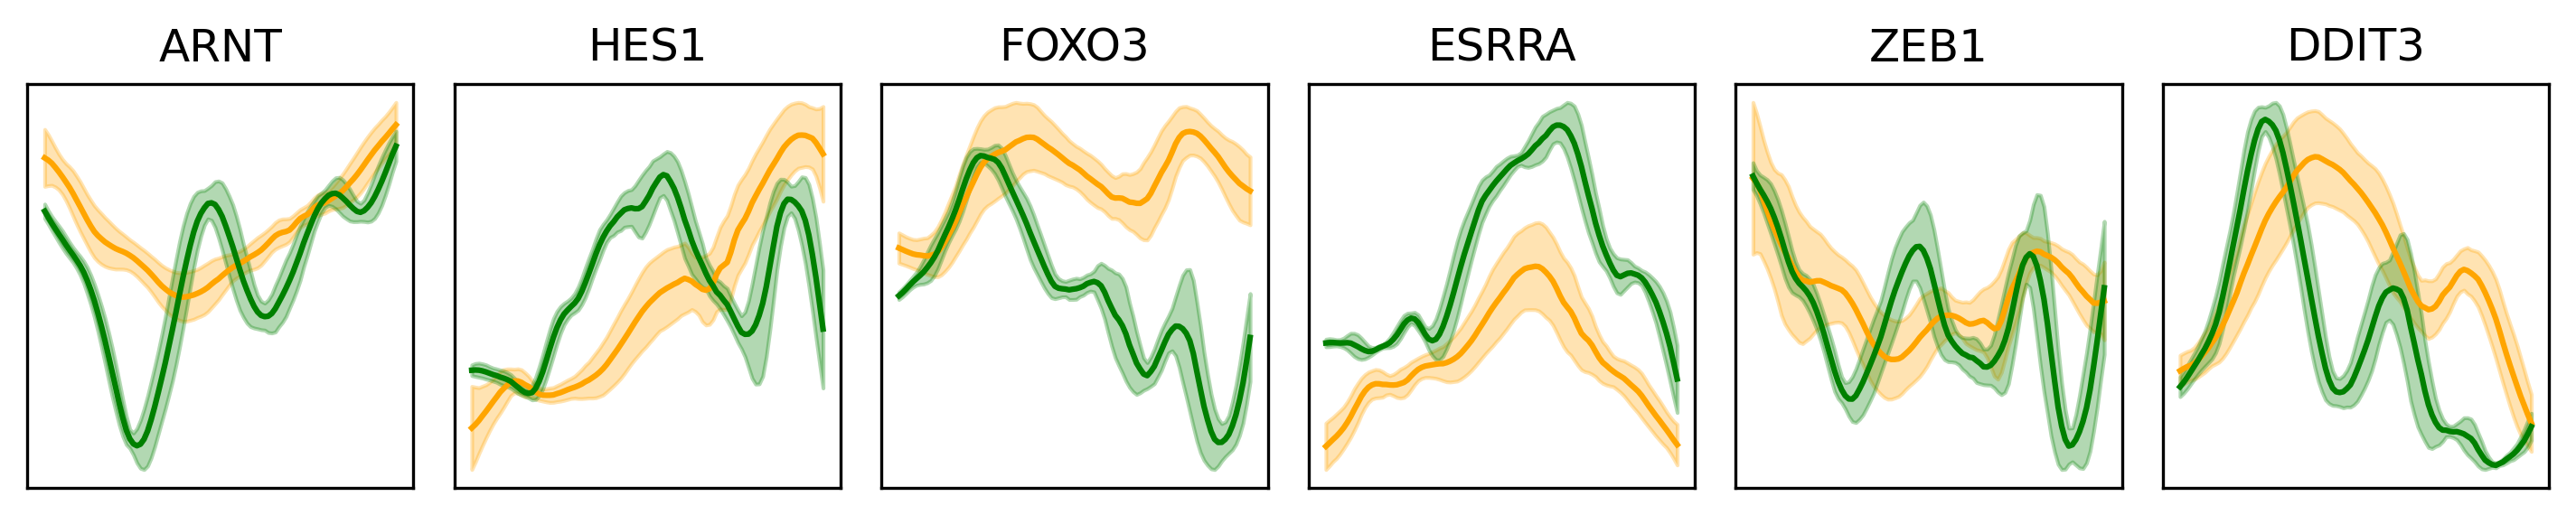

In [22]:
fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{fig_path}/figure_5F.png', bbox_inches='tight')
plt.show()

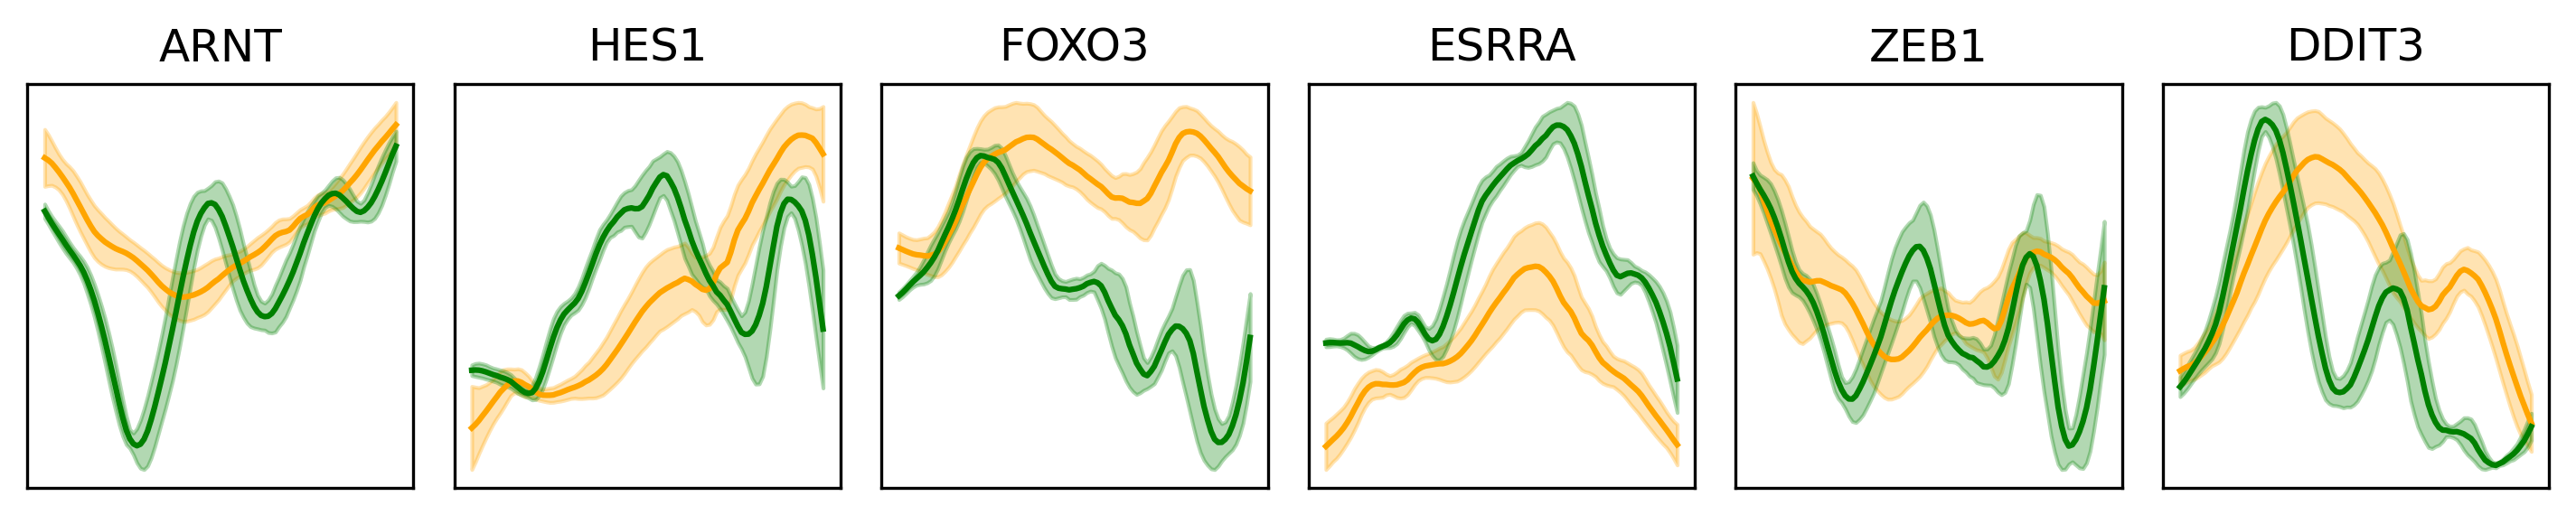

In [23]:
fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    ax.plot(traj_A_gene_mean[:, i], color='orange', label='Apoptotic')
    ax.fill_between(range(traj_A_gene_mean.shape[0]), traj_A_gene_mean[:, i] - traj_A_std[:, i], traj_A_gene_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_gene_mean[:, i], color='green', label='Tumor-forming')
    ax.fill_between(range(traj_T_gene_mean.shape[0]), traj_T_gene_mean[:, i] - traj_T_std[:, i], traj_T_gene_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{fig_path}/figure_5F.png', bbox_inches='tight')
plt.show()

ESRRA True
ZEB1 True
CDH1 True


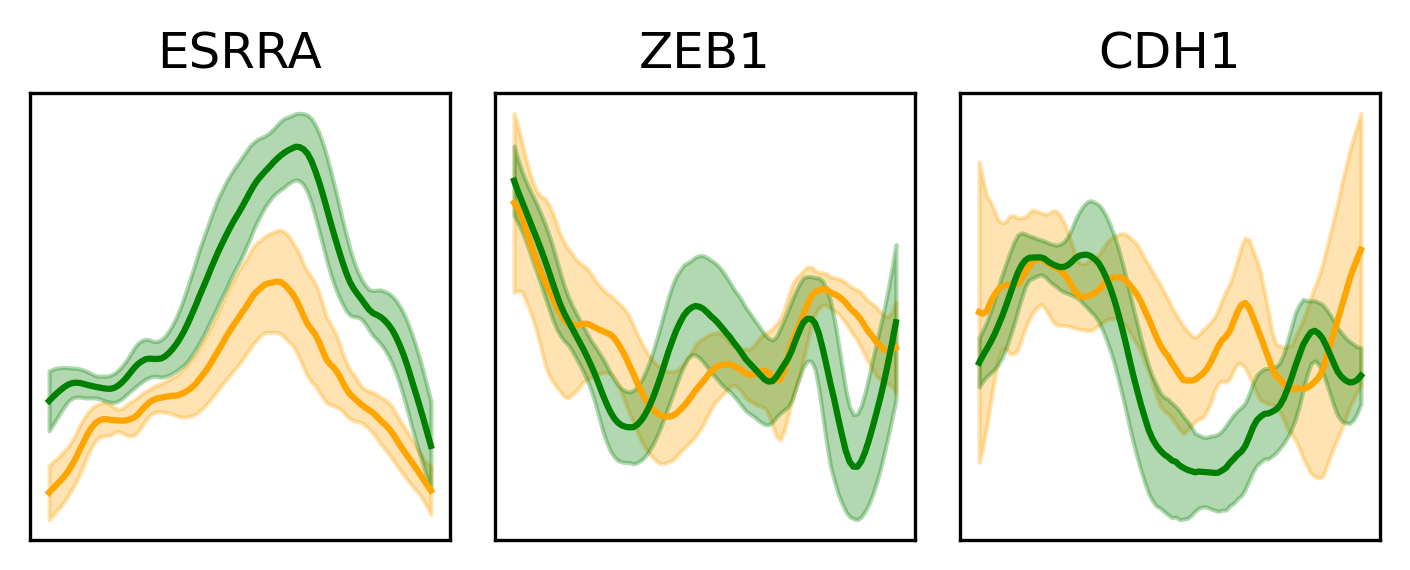

In [24]:
traj_A_gene = np.load('../results_final_Dec22/traj_gene_space_A.npy')
traj_T_gene = np.load('../results_final_Dec22/traj_gene_space_T.npy')
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['ESRRA', 'ZEB1', 'CDH1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene[:, :, gene_mask]
traj_T_gene = traj_T_gene[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='green')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{fig_path}/figure_6D.png', bbox_inches='tight')
plt.show()

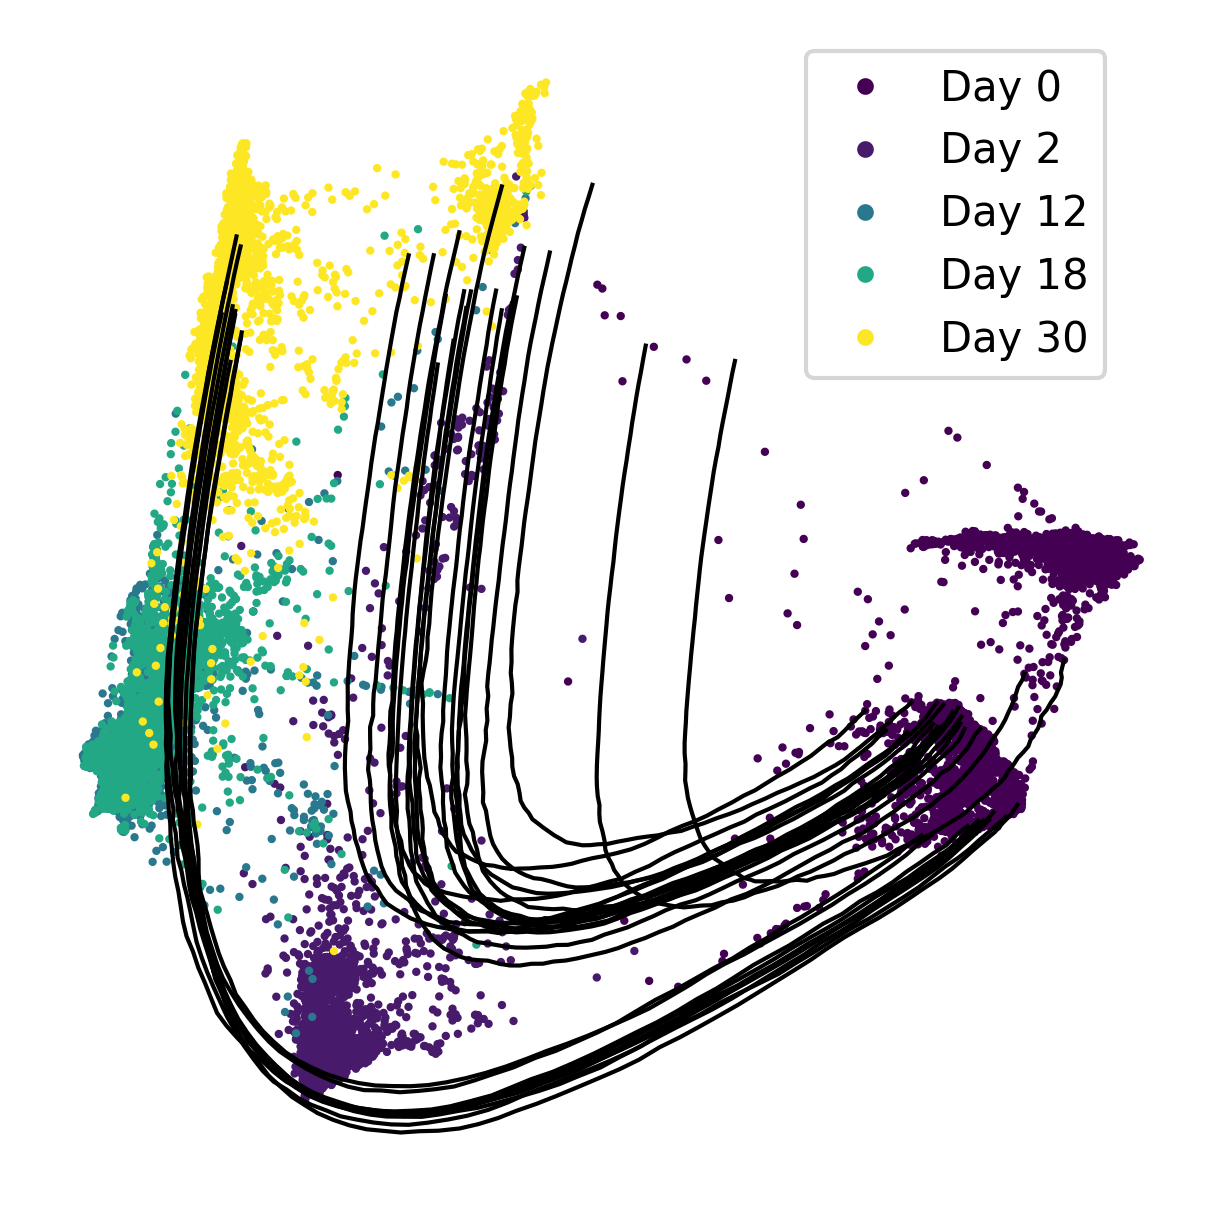

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the scatter plot
plt.figure(figsize=(5, 5), dpi=300)
sc = plt.scatter(X_phate[:, 0], X_phate[:, 1],
                 c=adata.obs['day'], s=1, alpha=1, cmap='viridis')

# Create the legend manually
unique_days = sorted(adata.obs['day'].unique())  # Get unique days
colors = sc.cmap(sc.norm(unique_days))  # Map unique days to colors

# Create legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f"Day {int(day)}")
    for day, color in zip(unique_days, colors)
]

# Add the legend to the plot
plt.legend(handles=legend_elements, bbox_to_anchor=(0.65, 1), loc='upper left')


np.random.seed(0)
# subsampled_idx = np.random.choice(traj_A.shape[1], 10, replace=False)
subsampled_idx = np.arange(traj_A.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_A[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='black');

np.random.seed(0)
subsampled_idx = np.random.choice(traj_T.shape[1], 10, replace=False)
# subsampled_idx = np.arange(traj_T.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_T[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='black');


# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{fig_path}/figure_3Ca.png', bbox_inches='tight')
plt.show()


In [26]:
cluster_df = pd.read_csv('../results_final_Dec22/cluster_heatmaps/sorted_cluster_labels.csv', index_col=0)

In [27]:
cluster_df

cluster_labels
NOC2L                 1
CAVIN1                1
RHOBTB3               1
STAT5B                1
CNP                   1
...                 ...
HMGCS1                5
ETV4                  5
RND2                  5
ITGA3                 5
SLC16A3               5

[2226 rows x 1 columns]

In [28]:
traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_T.npy')

In [29]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/alex_genes.txt').read().splitlines()
alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

In [30]:
granger_df = pd.read_csv('../results_final_Dec22/granger_result_Tumor_traj.csv', index_col=0)

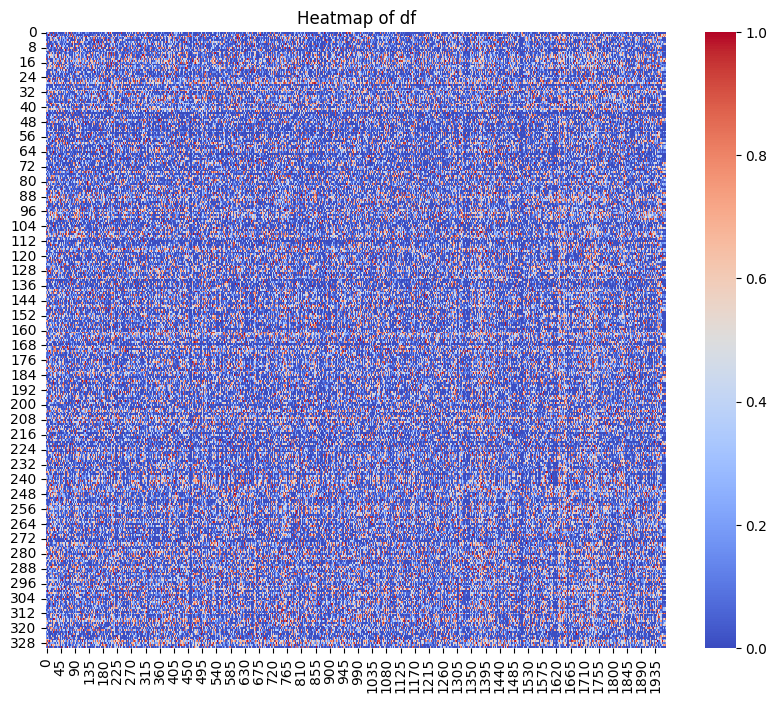

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# sns.heatmap(-np.log(df.values + 1e-10), cmap='coolwarm')
sns.heatmap(granger_df.values, cmap='coolwarm')
plt.title('Heatmap of df')
plt.show()

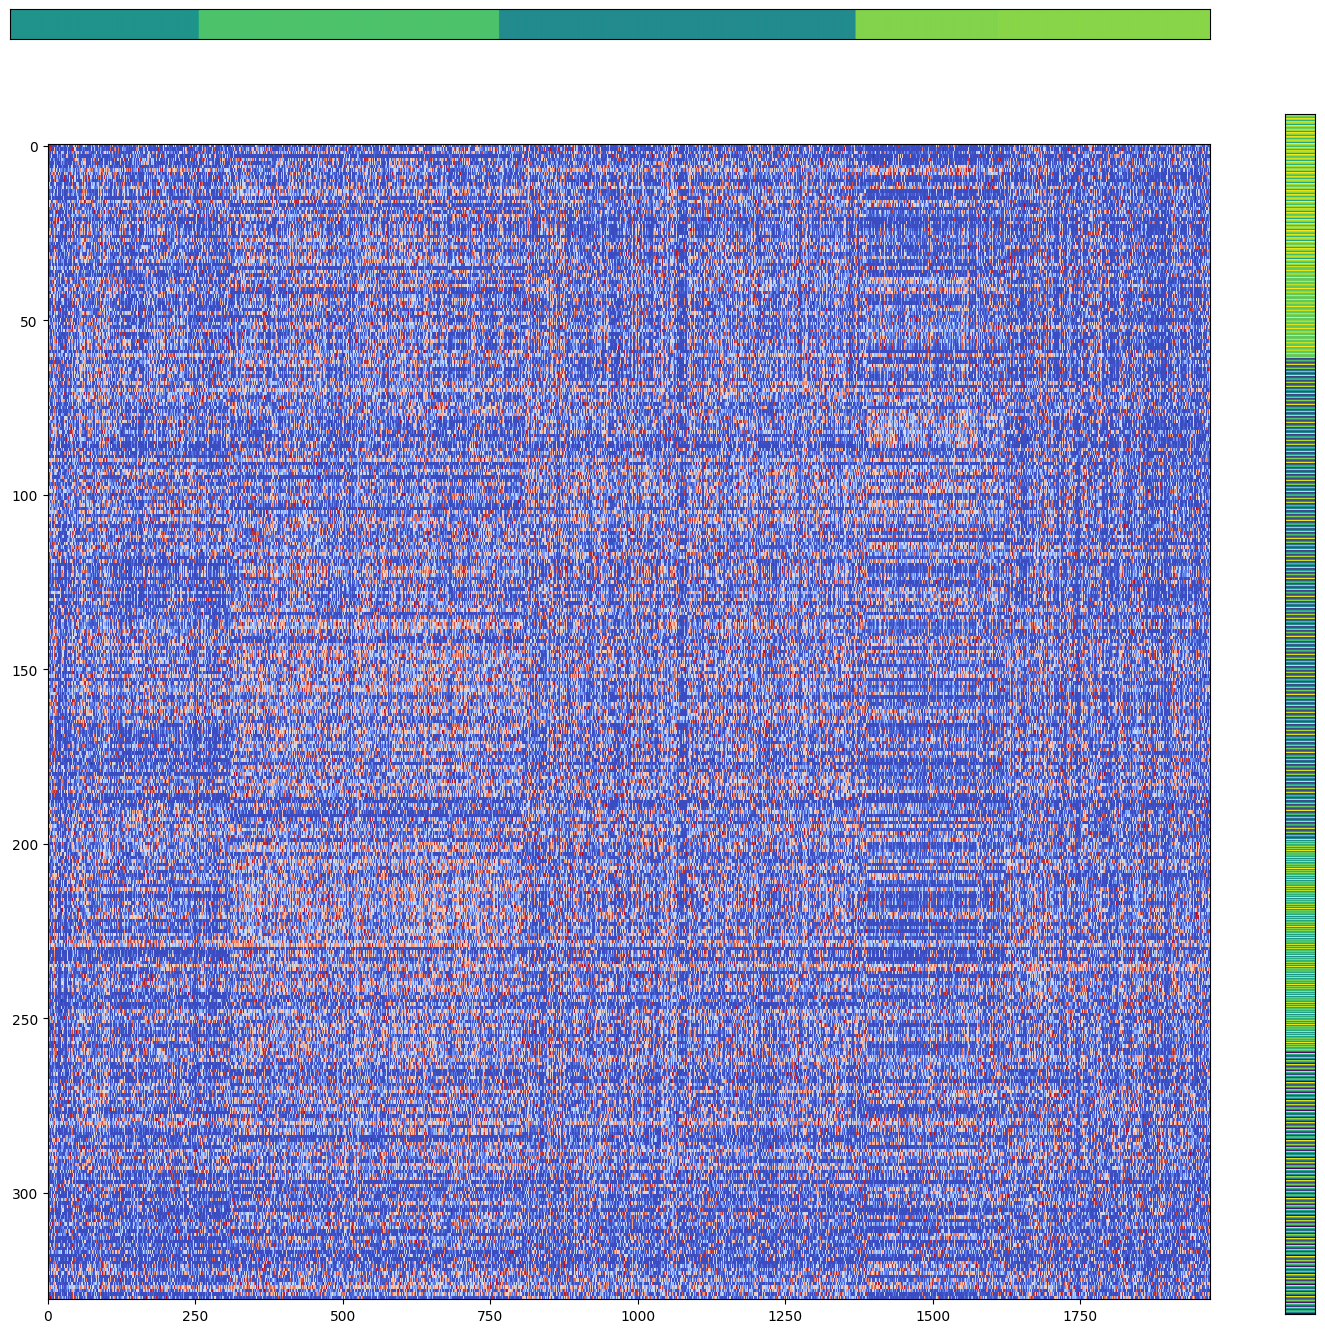

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cluster_df_row = cluster_df.loc[granger_df.index, :]
cluster_df_col = cluster_df.loc[granger_df.columns,:]

# Sort cluster_df by cluster labels
# sorted_cluster_df = cluster_df.sort_values('cluster_labels')
sorted_cluster_df_row = cluster_df_row.sort_values('cluster_labels')
sorted_cluster_df_col = cluster_df_col.sort_values('cluster_labels')
# Get the sorted indices that will keep genes from same cluster together
# sorted_indices = sorted_cluster_df.index.tolist()
sorted_indices_row = sorted_cluster_df_row.index.tolist()
sorted_indices_col = sorted_cluster_df_col.index.tolist()
# Reorder both rows and columns of granger_df using the sorted indices
sorted_granger_df = granger_df.loc[sorted_indices_row, sorted_indices_col]

# Create a mapping of cluster numbers to colors
unique_clusters_row = sorted_cluster_df_row['cluster_labels'].unique()
unique_clusters_col = sorted_cluster_df_col['cluster_labels'].unique()
cluster_colors_row = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters_row)))
cluster_colors_col = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters_col)))
cluster_color_map_row = dict(zip(unique_clusters_row, cluster_colors_row))
cluster_color_map_col = dict(zip(unique_clusters_col, cluster_colors_col))

# Create color arrays for rows and columns
row_colors = [cluster_color_map_row[cluster_df_row.loc[idx, 'cluster_labels']] for idx in sorted_granger_df.index]
col_colors = [cluster_color_map_col[cluster_df_col.loc[idx, 'cluster_labels']] for idx in sorted_granger_df.columns]

# Create the figure and axes
plt.figure(figsize=(15, 15))

# Create the heatmap
plt.imshow(sorted_granger_df, 
           cmap='coolwarm',
           aspect='auto',
           interpolation='nearest')

# Add colored bars for clusters
ax = plt.gca()
ax_row_colors = ax.figure.add_axes([0.95, 0.1, 0.02, 0.8])
ax_col_colors = ax.figure.add_axes([0.1, 0.95, 0.8, 0.02])

# Plot cluster colors
ax_row_colors.imshow(np.array(row_colors).reshape(-1, 1), aspect='auto', origin='lower')
ax_col_colors.imshow(np.array(col_colors).reshape(1, -1), aspect='auto', origin='lower')

# Remove ticks from color bars
ax_row_colors.set_xticks([])
ax_row_colors.set_yticks([])
ax_col_colors.set_xticks([])
ax_col_colors.set_yticks([])

plt.savefig('../figures_Dec22/figure_5C_granger.png', bbox_inches='tight', dpi=300)
plt.show()

In [33]:
gene_mask_all = np.isin(adata.var_names, list(set(alex_genes) | set(alex_tfs)))
traj_T_gene_all = traj_T_gene_all[:, :, gene_mask_all]
gene_names_all = adata.var_names[gene_mask_all]